# TME2

## Normalisation des données

In [1]:
import torch
from torch.utils import tensorboard
from torch.utils.tensorboard import SummaryWriter
## Installer datamaestro et datamaestro-ml pip install datamaestro datamaestro-ml
import datamaestro
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


writer = SummaryWriter()
data=datamaestro.prepare_dataset("edu.uci.boston")
colnames, datax, datay = data.data()
datax = torch.tensor(datax,dtype=torch.float)
datay = torch.tensor(datay,dtype=torch.float).reshape(-1,1)

scaler = StandardScaler()
datax = scaler.fit_transform(datax)
X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.30)
X_train = torch.tensor(X_train,dtype=torch.float64)
X_test = torch.tensor(X_test,dtype=torch.float64)

## Descente de gradient

In [3]:
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

class GradientDescent:
    def __init__(self,Xtrain,Xtest,ytrain,ytest,batch_size=30,epsilon=0.05):
        self.Xtrain = Xtrain
        self.Xtest = Xtest
        self.ytrain = ytrain
        self.ytest = ytest
        self.batch_size = batch_size
        self.epsilon = epsilon
        self.writer = SummaryWriter()
        self.nb_samples = Xtrain.shape[0]
        self.nbOutputs = ytrain.shape[1]
        self.nbBatchs = int(self.nb_samples/self.batch_size)
        self.W = torch.randn(Xtrain.shape[1],self.nbOutputs, requires_grad=True, dtype=torch.float64)
        self.b = torch.randn(1,self.nbOutputs, requires_grad=True, dtype=torch.float64)
        self.trainError = []
        self.testError = []

    def run(self,nb_epochs=100):
        for n_iter in range(nb_epochs):
            perm = [torch.randperm(self.nb_samples)[k:k+self.batch_size] for k in range(self.nbBatchs)]
            for mini_batch in perm:
                yhat = Linear.forward(self.Xtrain[mini_batch],self.W,self.b)
                loss = MSE.forward(yhat,self.ytrain[mini_batch])
                loss.backward()
                ##  TODO:  Calcul du backward (grad_w, grad_b)
                dw, db = self.W.grad, self.b.grad
                ##  TODO:  Mise à jour des paramètres du modèle
                self.W.data -= self.epsilon*dw
                self.b.data -= self.epsilon*db
                self.W.grad.data.zero_()
                self.b.grad.data.zero_()
            yhat = Linear.forward(self.Xtrain,self.W,self.b)
            trainLoss = MSE.forward(yhat,self.ytrain)
            self.trainError.append(trainLoss)
            with torch.no_grad():
                #forward + loss sur test
                yhat = Linear.forward(self.Xtest,self.W,self.b)
                testLoss = MSE.forward(yhat,self.ytest)
                self.testError.append(testLoss)
                self.writer.add_scalar('Loss/Test', testLoss, n_iter)
            if (n_iter % 20 == 0):
                #print(f"Itérations {n_iter}: loss {trainLoss}")
                print(f"Itérations {n_iter}: test loss {testLoss}")
            self.writer.add_scalar('Loss/train', trainLoss, n_iter)
        #Cumul loss
        plt.plot([i for i in range(nb_epochs)],self.trainError,label="Train Error")
        plt.plot([i for i in range(nb_epochs)],self.testError,label="Test error")
        if self.batch_size == 1:
            plt.title("Descente de gradient stochastique, epsilon={}".format(self.epsilon))
        else:
            plt.title("Descente de gradient mini-batch, epsilon={}".format(self.epsilon))
        plt.xlabel("nb itérations")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig("sgd, epsilon={}.png".format(self.epsilon))
        plt.show()
        return self.trainError, self.testError

Itérations 0: test loss 74.12946723609056
Itérations 20: test loss 23.350355562653743
Itérations 40: test loss 22.528342785090068
Itérations 60: test loss 22.181712135749265
Itérations 80: test loss 22.86623430058022
Itérations 100: test loss 23.691306144454
Itérations 120: test loss 21.37311475421358
Itérations 140: test loss 23.67706867338321
Itérations 160: test loss 22.670812269687534
Itérations 180: test loss 22.833329292821475
Itérations 200: test loss 23.765165699180688
Itérations 220: test loss 24.43976714036409
Itérations 240: test loss 22.267800155660144
Itérations 260: test loss 23.337226316173627
Itérations 280: test loss 22.647884624174793


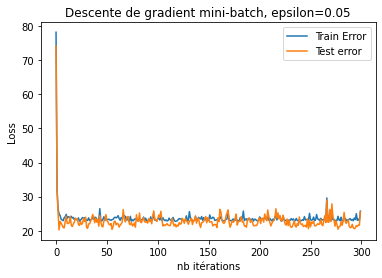

In [4]:
SGD = GradientDescent(X_train,X_test,y_train,y_test)
minibatchTrainError , minibatchTestError = SGD.run(300)

Itérations 0: test loss 572.2352087423347
Itérations 20: test loss 137.21969067813623
Itérations 40: test loss 50.4978412918953
Itérations 60: test loss 28.4080411957375
Itérations 80: test loss 22.94382188351464
Itérations 100: test loss 21.475831859934377
Itérations 120: test loss 20.95424743838764
Itérations 140: test loss 21.124598704612346
Itérations 160: test loss 21.114146642863986
Itérations 180: test loss 21.687454859630403
Itérations 200: test loss 21.641850292274988
Itérations 220: test loss 21.74640487723051
Itérations 240: test loss 22.155920875822595
Itérations 260: test loss 22.1019991024568
Itérations 280: test loss 22.109097616394173


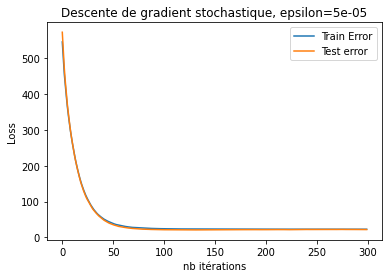

In [5]:
SGD = GradientDescent(X_train,X_test,y_train,y_test,batch_size=1,epsilon=0.00005)
SGDTrainError , SGDTestError = SGD.run(300)

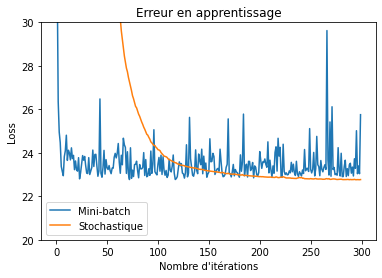

In [6]:
plt.plot([i for i in range(300)],minibatchTrainError,label="Mini-batch")
plt.plot([i for i in range(300)],SGDTrainError,label="Stochastique")
plt.ylim(20, 30)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Loss")
plt.title("Erreur en apprentissage")
plt.legend()
plt.savefig("mbVSstTrain")
plt.show()

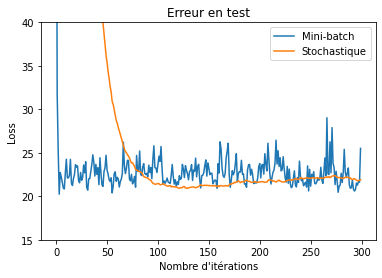

In [7]:
plt.plot([i for i in range(300)],minibatchTestError,label="Mini-batch")
plt.plot([i for i in range(300)],SGDTestError,label="Stochastique")
plt.ylim(15, 40)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Loss")
plt.title("Erreur en test")
plt.legend()
plt.savefig("mbVSst")
plt.show()

Itérations 0: test loss 449.57069004696444
Itérations 20: test loss 22.349935823121488
Itérations 40: test loss 23.588113793780163
Itérations 60: test loss 22.689466537535804
Itérations 80: test loss 21.66843850703226


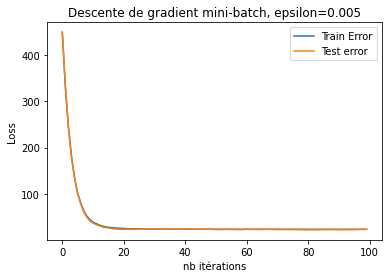

Itérations 0: test loss 517.9604177221524
Itérations 20: test loss 138.811608730324
Itérations 40: test loss 53.2667226031459
Itérations 60: test loss 30.617911203958453
Itérations 80: test loss 24.76523241803585


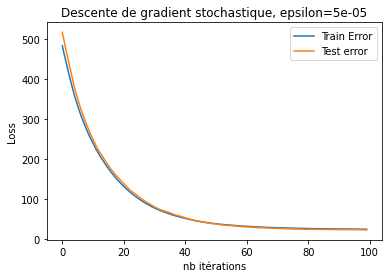

Itérations 0: test loss 482.70645756247785
Itérations 20: test loss 32.688512871548795
Itérations 40: test loss 22.559096439140433
Itérations 60: test loss 21.944055509816828
Itérations 80: test loss 21.992013375958578


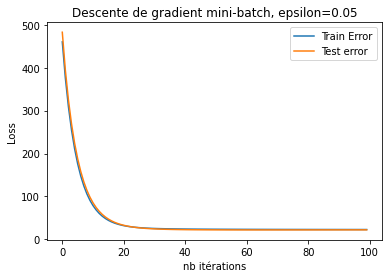

In [8]:
minibatch = GradientDescent(X_train,X_test,y_train,y_test,epsilon=0.005,batch_size=20)
minibatch.run()
stochastic = GradientDescent(X_train,X_test,y_train,y_test,batch_size=1,epsilon=0.00005)
stochastic.run()
batch = GradientDescent(X_train,X_test,y_train,y_test,batch_size=X_train.shape[0],epsilon=0.05)
_ = batch.run()

In [9]:
%load_ext tensorboard
%reload_ext tensorboard

In [10]:
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 11012), started 2 days, 3:14:13 ago. (Use '!kill 11012' to kill it.)

## Réseau de neurones

In [19]:
class NeuralNetwork:
    def __init__(self,Xtrain,Xtest,ytrain,ytest,hidden_layer_neurons=10, batch_size=30,epsilon=0.05,verbose=True):
        self.Xtrain = Xtrain
        self.Xtest = Xtest
        self.ytrain = ytrain
        self.ytest = ytest
        self.batch_size = batch_size
        self.epsilon = epsilon
        self.writer = SummaryWriter()
        self.nb_samples = Xtrain.shape[0]
        self.Xdimension = Xtrain.shape[1]
        self.nbOutputs = ytrain.shape[1]
        self.hidden_layer_neurons = hidden_layer_neurons 
        self.verbose = verbose
        self.nbBatchs = int(self.nb_samples/self.batch_size)
        self.trainError = []
        self.testError = []
        self.layers = [torch.nn.Linear(in_features=self.Xdimension, out_features=self.hidden_layer_neurons).double(),
        torch.nn.Tanh(),
        torch.nn.Linear(in_features=self.hidden_layer_neurons, out_features=self.nbOutputs).double()]
        self.layers = torch.nn.Sequential(*self.layers)
        self.optim = torch.optim.Adam(params=(par for layer in self.layers for par in layer.parameters()),lr=self.epsilon)
        self.optim.zero_grad()
        

    def forward(self,X):   
        for layer in self.layers:
            X = layer(X)
        return X
    
    def run(self,nb_epochs=100):
        for n_iter in range(nb_epochs):
            perm = [torch.randperm(self.nb_samples)[k:k+self.batch_size] for k in range(self.nbBatchs)]
            for mini_batch in perm:
                yhat = self.forward(self.Xtrain[mini_batch])
                loss = MSE.forward(yhat,self.ytrain[mini_batch])
                loss.backward()
                self.optim.step() # Mise-à-jour des paramètres w et b
                self.optim.zero_grad() # Reinitialisation du gradient
            yhat = self.forward(self.Xtrain)
            trainLoss = MSE.forward(yhat,self.ytrain)
            self.trainError.append(trainLoss)
            self.writer.add_scalar('Loss/train', trainLoss, n_iter)
            with torch.no_grad():
                #forward + loss sur test
                yhat = self.forward(self.Xtest)
                testLoss = MSE.forward(yhat,self.ytest)
                self.testError.append(testLoss)
            if (n_iter % 50 == 0):
                #print(f"Itérations {n_iter}: loss {trainLoss}")
                print(f"Itérations {n_iter}: test loss {testLoss}")
        print(f"Itérations {n_iter}: test loss {testLoss}")
        #Cumul loss
        if self.verbose == True:
            plt.plot([i for i in range(nb_epochs)],self.trainError,label="Train Error")
            plt.plot([i for i in range(nb_epochs)],self.testError,label="Test error")
            if self.batch_size == 1:
                plt.title("Descente de gradient stochastique, epsilon={}".format(self.epsilon))
            else:
                plt.title("Descente de gradient mini-batch, epsilon={}".format(self.epsilon))
            plt.xlabel("nb itérations")
            plt.ylabel("Loss")
            plt.legend()
            plt.show()
        return self.trainError,self.testError
        

# Campagne d'expérimentations

Itérations 0: test loss 596.6877041838683
Itérations 50: test loss 39.976447749772895
Itérations 100: test loss 23.045558646679318
Itérations 150: test loss 16.758390245247504
Itérations 200: test loss 13.952340650293253
Itérations 250: test loss 13.926364073591825
Itérations 299: test loss 13.161324267070615


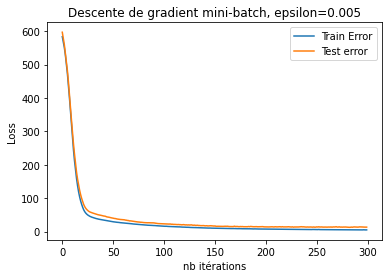

In [12]:
NN = NeuralNetwork(X_train,X_test,y_train,y_test,epsilon=0.005,hidden_layer_neurons=20)
NNtrainError, NNTestError = NN.run(300)

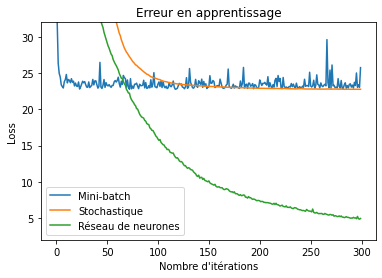

In [13]:
plt.plot([i for i in range(300)],minibatchTrainError,label="Mini-batch")
plt.plot([i for i in range(300)],SGDTrainError,label="Stochastique")
plt.plot([i for i in range(300)],NNtrainError,label="Réseau de neurones")
plt.ylim(2, 32)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Loss")
plt.title("Erreur en apprentissage")
plt.legend()
plt.savefig("sgdVSnn")
plt.show()

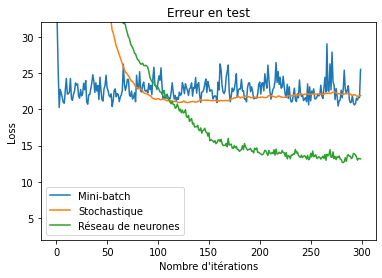

In [14]:
plt.plot([i for i in range(300)],minibatchTestError,label="Mini-batch")
plt.plot([i for i in range(300)],SGDTestError,label="Stochastique")
plt.plot([i for i in range(300)],NNTestError,label="Réseau de neurones")
plt.ylim(2, 32)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Loss")
plt.title("Erreur en test")
plt.legend()
plt.savefig("sgdVSnnTEST")
plt.show()

Itérations 0: test loss 410.28172224444864
Itérations 20: test loss 22.111277598612055
Itérations 40: test loss 21.311766096334203
Itérations 60: test loss 21.831844727925528
Itérations 80: test loss 22.51387668113926
Itérations 100: test loss 22.72439272955016
Itérations 120: test loss 22.719652229036146
Itérations 140: test loss 22.077426737332893
Itérations 160: test loss 21.85719095513874
Itérations 180: test loss 22.672798530946764
Itérations 200: test loss 21.953367248192862
Itérations 220: test loss 22.171240388092617
Itérations 240: test loss 22.425445951343576
Itérations 260: test loss 22.22161726346382
Itérations 280: test loss 22.032845051383873


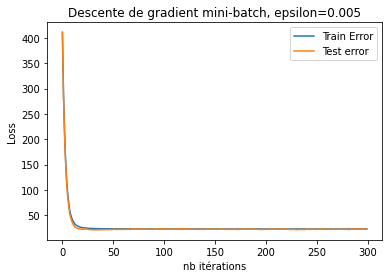

Itérations 0: test loss 438.8415453838804
Itérations 20: test loss 46.62976879274512
Itérations 40: test loss 22.669019725594445
Itérations 60: test loss 21.54800691335221
Itérations 80: test loss 21.834355154334943
Itérations 100: test loss 21.800585293181868
Itérations 120: test loss 22.13759367994878
Itérations 140: test loss 22.231644917459864
Itérations 160: test loss 22.265872910365243
Itérations 180: test loss 21.954602885651877
Itérations 200: test loss 22.196653675071904
Itérations 220: test loss 22.31078907182932
Itérations 240: test loss 22.170513891936963
Itérations 260: test loss 22.121435802669065
Itérations 280: test loss 22.360667611027903


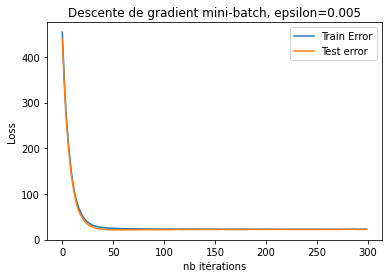

Itérations 0: test loss 641.751446778063
Itérations 20: test loss 181.74055278721275
Itérations 40: test loss 72.30758896216761
Itérations 60: test loss 38.21125573189353
Itérations 80: test loss 27.760652124201865
Itérations 100: test loss 24.552959995603906
Itérations 120: test loss 23.551337547045573
Itérations 140: test loss 23.37658943470556
Itérations 160: test loss 23.195758239146997
Itérations 180: test loss 22.946942348967912
Itérations 200: test loss 22.832455666662696
Itérations 220: test loss 23.009200868920793
Itérations 240: test loss 22.88620385059017
Itérations 260: test loss 23.13352033623469
Itérations 280: test loss 22.78149781832578


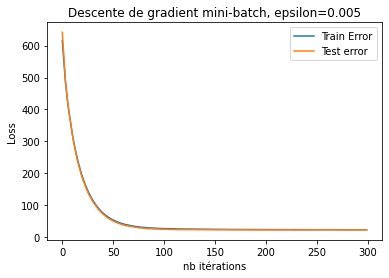

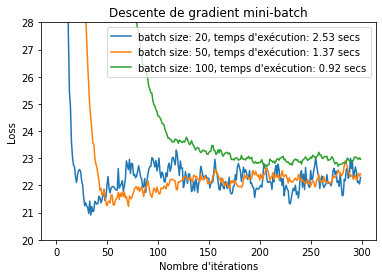

In [15]:
arrayRes = []
arrayTime = []
array_batch_size = [20,50,100]
nb_epochs=300
import time
for batch_size in array_batch_size:
    start_time = time.time()
    SGD = GradientDescent(X_train,X_test,y_train,y_test,batch_size=batch_size,epsilon=0.005)
    minibatchTrainError , minibatchTestError = SGD.run(nb_epochs)
    arrayRes.append(minibatchTestError)
    arrayTime.append((time.time() - start_time))
for i in range(len(arrayRes)):
    plt.plot([i for i in range(nb_epochs)],arrayRes[i],label="batch size: {}, temps d'exécution: {:.2f} secs".format(array_batch_size[i], arrayTime[i]))
plt.ylabel("Loss")
plt.xlabel("Nombre d'itérations")
plt.title("Descente de gradient mini-batch")
plt.legend()
plt.savefig("batch_size")
plt.ylim(20,28)
plt.show()

Itérations 0: test loss 587.2534454516781
Itérations 50: test loss 194.8296035097714
Itérations 100: test loss 88.97496968192051
Itérations 150: test loss 59.99855785139888
Itérations 200: test loss 45.22462791447063
Itérations 250: test loss 36.67963052514586
Itérations 299: test loss 29.740831533697598
Itérations 0: test loss 606.6594927356742
Itérations 50: test loss 64.56435014680955
Itérations 100: test loss 38.39489239630867
Itérations 150: test loss 27.537826228636526
Itérations 200: test loss 23.981519140740396
Itérations 250: test loss 22.01728235843602
Itérations 299: test loss 21.136879532718226
Itérations 0: test loss 567.1091211667068
Itérations 50: test loss 34.61148802081508
Itérations 100: test loss 22.533039581765195
Itérations 150: test loss 19.241854870353563
Itérations 200: test loss 16.459934566056575
Itérations 250: test loss 15.69381922109923
Itérations 299: test loss 14.585077468510324
Itérations 0: test loss 566.5707837152869
Itérations 50: test loss 18.8283881

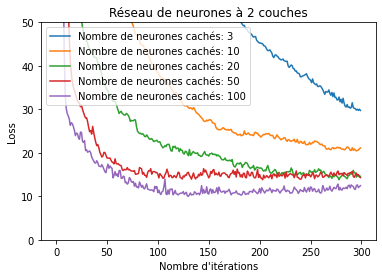

In [30]:
arrayNeurons = [3,10,20,50,100]
arrayRes = []
nb_epochs = 300
for neuron in arrayNeurons:
    NN = NeuralNetwork(X_train,X_test,y_train,y_test,epsilon=0.005,hidden_layer_neurons=neuron,verbose=False)
    NNtrainError, NNTestError = NN.run(nb_epochs)
    arrayRes.append(NNTestError)
for i in range(len(arrayRes)):
    plt.plot([i for i in range(nb_epochs)],arrayRes[i],label="Nombre de neurones cachés: {}".format(arrayNeurons[i]))
plt.ylabel("Loss")
plt.xlabel("Nombre d'itérations")
plt.title("Réseau de neurones à 2 couches")
plt.legend()
plt.ylim(0,50)
plt.savefig("NNlayers")
plt.show()